In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import tribus
from visualization import heatmap_for_median_expression, marker_expression, umap_vis, z_score, cell_type_distribution

c:\Users\Localadmin_kangzigi\.conda\envs\tribus_new\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Read in data

In [64]:
# read in your dataset
import os
path = "D:/Projects/NKI_TMAs/Whole_slide_validation/tribus_analysis"
output_path = "D:/Projects/NKI_TMAs/Whole_slide_validation/tribus_analysis/output_data"
os.makedirs('{}'.format(output_path), exist_ok=True)

sample_name = "S123_iOme"
sample_data = pd.read_csv('{}/input_data/{}.csv'.format(path, sample_name),low_memory=False)
print("Data dimension is {}".format(np.shape(sample_data)))
sample_data.columns

Data dimension is (644894, 30)


Index(['Unnamed: 0', 'CellID', 'DNA1', 'CD4', 'CK7', 'HLA-A', 'Vimentin',
       'DNA2', 'PAX8', 'HLA-DPB1', 'PD1', 'DNA3', 'CD45RO', 'CD3D', 'CD45',
       'DNA4', 'IBA1', 'CD11c', 'CD8a', 'X_centroid', 'Y_centroid', 'Area',
       'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity',
       'Extent', 'Sample', 'Condition', 'Replicate'],
      dtype='object')

In [65]:
cols = ['DNA1', 'CD4', 'CK7', 'HLA-A', 'Vimentin',
       'DNA2', 'PAX8', 'HLA-DPB1', 'PD1', 'DNA3', 'CD45RO', 'CD3D', 'CD45',
       'DNA4', 'IBA1', 'CD11c', 'CD8a']
Q = sample_data[cols].quantile(0.999)
sample_data = sample_data[~((sample_data[cols] > Q)).any(axis=1)]
print("Removing the outliers. Current data dimension is {}".format(np.shape(sample_data)))
sample_data[cols].describe()

Removing the outliers. Current data dimension is (635934, 30)


,DNA1,CD4,CK7,HLA-A,Vimentin,DNA2,PAX8,HLA-DPB1,PD1,DNA3,CD45RO,CD3D,CD45,DNA4,IBA1,CD11c,CD8a
count,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000,635934.000000
mean,5089.344022,3.072714,2.791552,3.535114,3.131662,4785.351612,2.814537,2.756336,2.482460,3791.162942,2.919271,2.654919,2.671077,4527.687881,3.085098,2.872075,2.849568
std,2144.846698,0.135230,0.563928,0.354957,0.351464,2378.566234,0.735770,0.782617,0.686580,2243.311976,0.089584,0.085888,0.124134,3120.905072,0.252636,0.441378,0.322200
min,608.067121,2.557604,2.116283,2.273625,2.084254,0.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,-3.000000,-3.000000,93.840336,2.266384,1.995381,2.071391
25%,3488.964950,2.979875,2.397046,3.300451,2.942209,3107.973334,2.834548,2.576294,2.548030,2190.281828,2.875688,2.610673,2.580711,2343.481326,2.962790,2.488756,2.668136
50%,4797.979358,3.058090,2.516734,3.587992,3.220847,4509.642955,2.885804,2.800857,2.568812,3483.836460,2.925710,2.653386,2.634966,4163.305459,3.097254,2.785705,2.778895
75%,6391.741930,3.151940,3.079592,3.794283,3.386090,6197.153648,2.952176,3.066318,2.586902,5116.246817,2.974560,2.701543,2.735451,6334.208842,3.245761,3.228868,2.986363
max,14763.340564,3.632814,4.687571,4.446975,3.826270,15366.787470,3.435916,3.994723,2.787872,13811.131707,3.233695,3.113414,3.229296,18823.383023,3.765468,4.040634,3.844723


<Figure size 2000x1200 with 0 Axes>

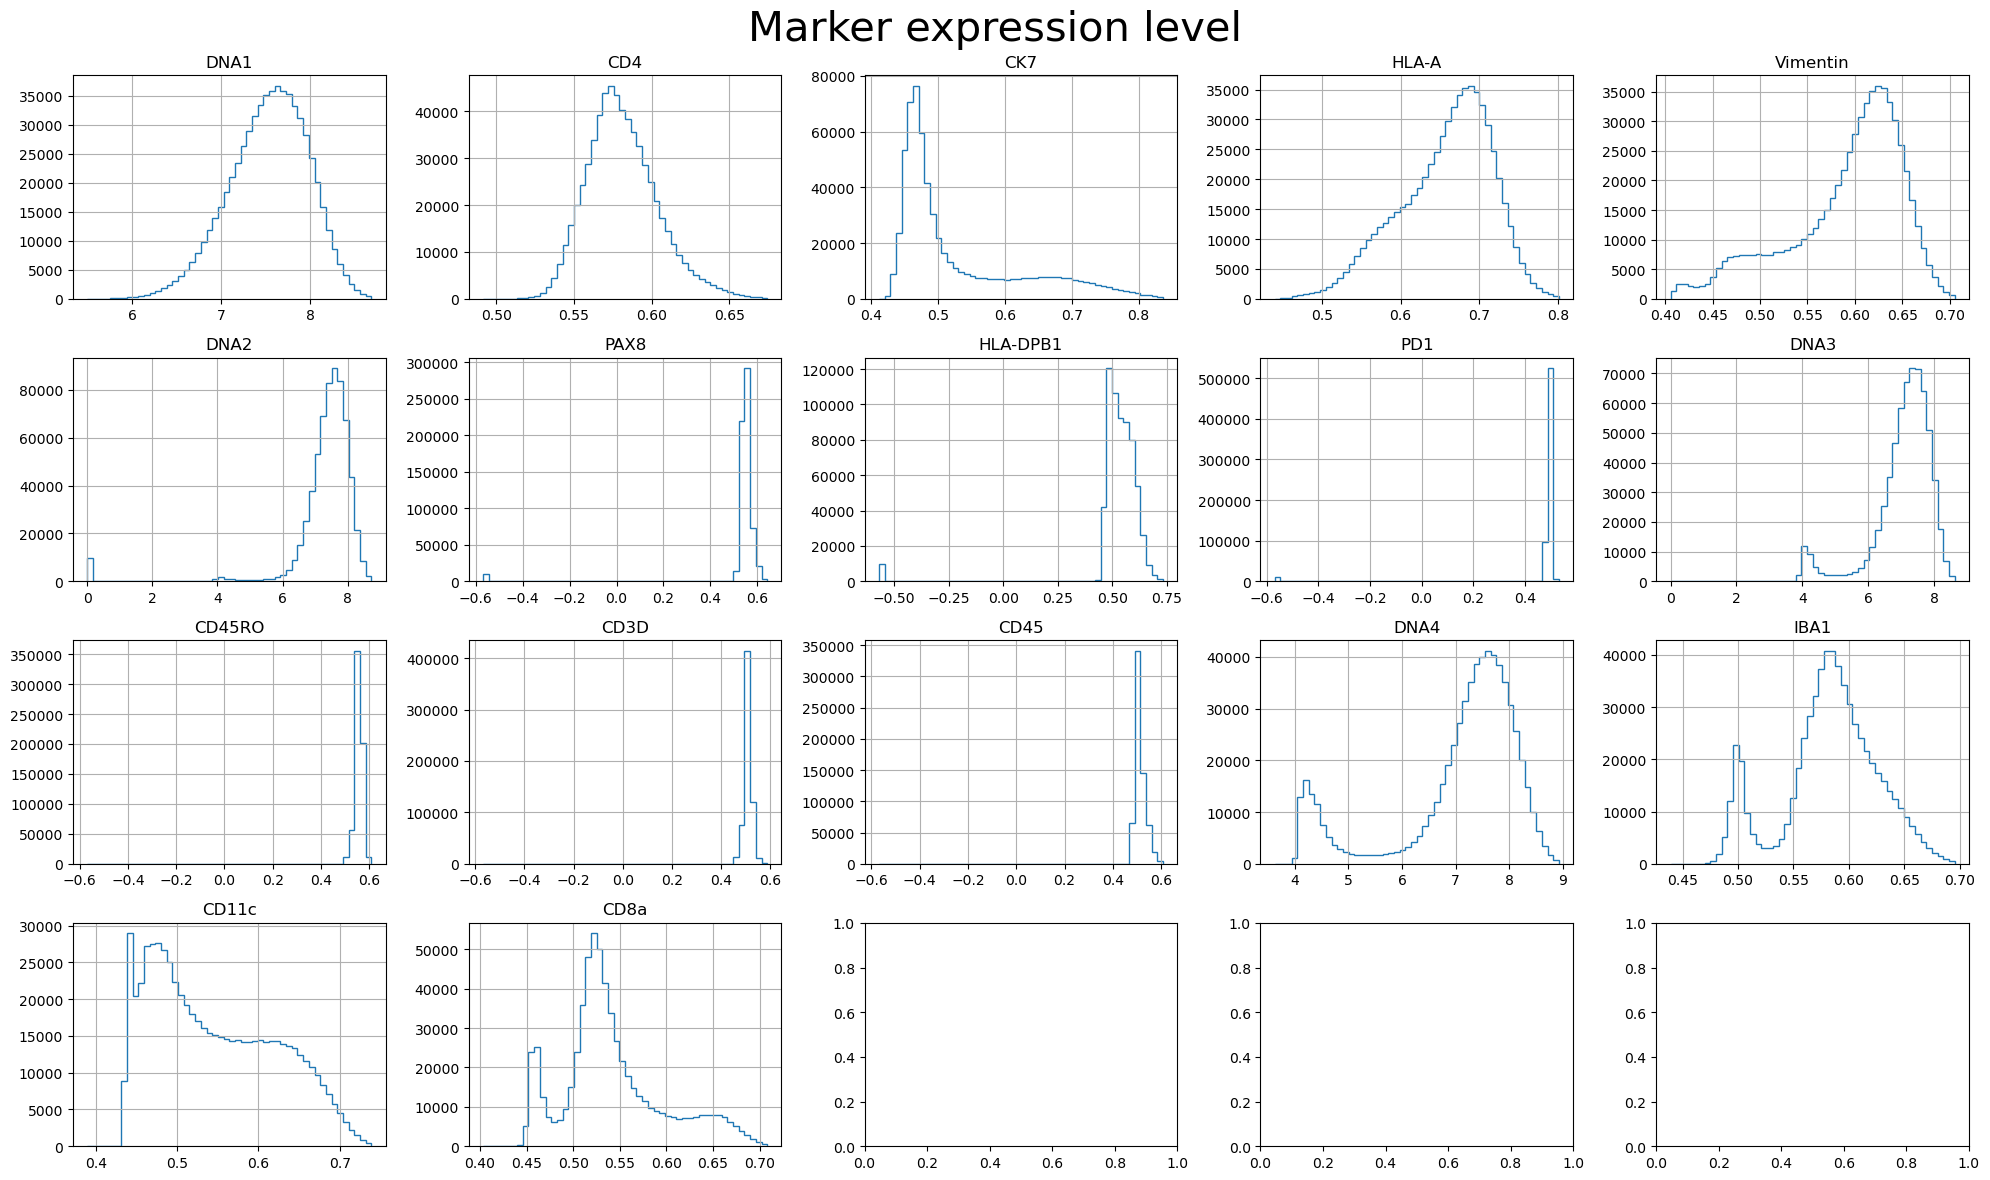

In [66]:
marker_expression(np.arcsinh(sample_data[cols]/5.0), markers=None, save=True, fname="{}/{}_marker_expression.png".format(output_path, sample_name), dpi='figure', log=False)
marker_expression(np.arcsinh(sample_data[cols]/5.0), markers=None, save=False, fname="{}/{}_marker_expression.png".format(output_path, sample_name), dpi='figure', log=False)

In [67]:
# read logic table
logic_table_name = "logic_table8"
df = pd.ExcelFile("{}/{}.xlsx".format(path, logic_table_name))
logic = pd.read_excel(df, df.sheet_names, index_col=0)

In [68]:
logic

{'Global':           Cancer  Stromal  CD4.T.cell  CD8.T.cell  CD11c.Myeloid  IBA1.Myeloid
 Marker                                                                        
 CK7            1       -1          -1          -1             -1            -1
 PAX8           1        0           0           0              0             0
 Vimentin      -1        1           0           0              0             0
 CD4            0       -1           1          -1             -1            -1
 CD8a           0       -1          -1           1             -1            -1
 IBA1           0        0           0           0              0             1
 CD11c          0        0           0           0              1             0}

# Run Tribus

In [69]:
# set random seed to ensure reproducity
depth = 1
labels, scores = tribus.run_tribus(np.arcsinh(sample_data[cols]/5.0), logic, depth=depth, normalization=z_score, 
                            tuning=0, sigma=1, learning_rate=1, 
                            clustering_threshold=100, undefined_threshold=0.0005, other_threshold=0.4, random_state=42)

Global, subsetting done
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.6274461306416064
2.5797544002532957 minutes


In [70]:
labels

,Global,final_label
0,CD8.T.cell,CD8.T.cell
1,Cancer,Cancer
2,Cancer,Cancer
3,Cancer,Cancer
4,Cancer,Cancer
...,...,...
644889,CD4.T.cell,CD4.T.cell
644890,Cancer,Cancer
644891,Cancer,Cancer
644892,CD4.T.cell,CD4.T.cell


# Visualization

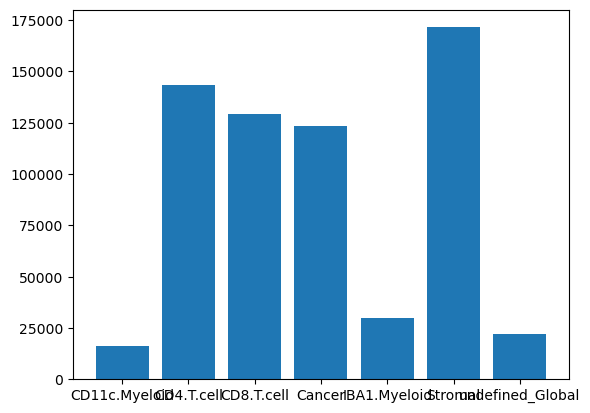

<Figure size 1600x700 with 0 Axes>

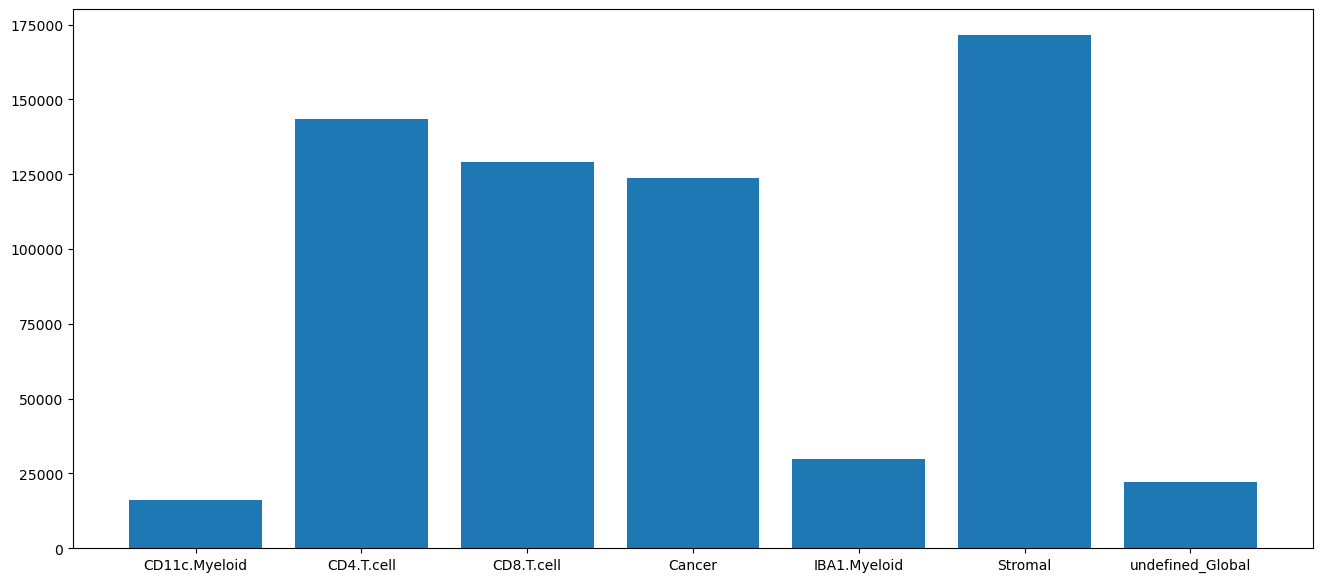

In [71]:
tribus.cell_type_distribution(labels, level="Global", save=False, fname=None, dpi="Figure")
plt.figure(figsize = (16,7))
tribus.cell_type_distribution(labels, level="final_label", save=True, fname="{}/{}_{}_barplot.png".format(output_path, sample_name, logic_table_name), dpi="Figure")
plt.figure(figsize = (16,7))
tribus.cell_type_distribution(labels, level="final_label", save=False, fname=None, dpi="Figure")

<Figure size 800x600 with 0 Axes>

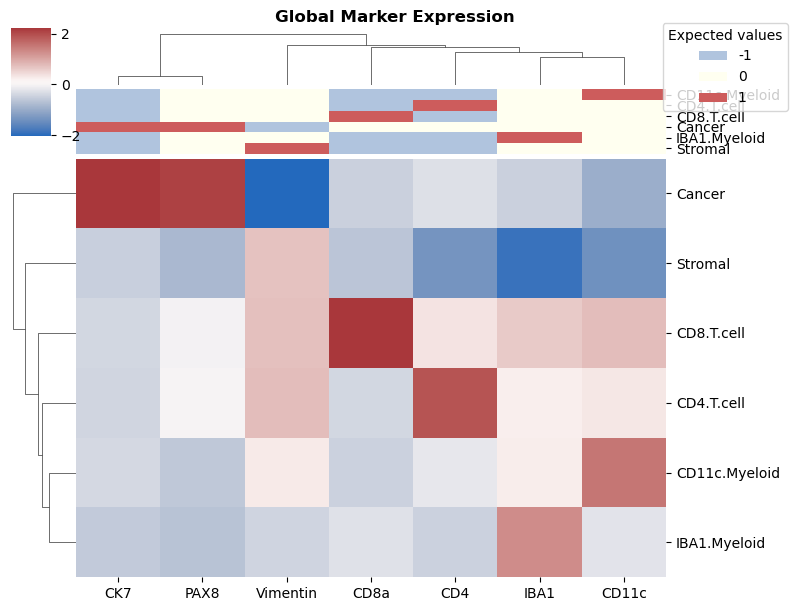

In [72]:
for i in labels.columns.values.tolist()[ : -1]: 
    heatmap_for_median_expression(sample_data, labels, logic, level=i, save=True, fname="{}/{}_{}_heatmap.png".format(output_path, sample_name, logic_table_name), 
                                    dpi='figure', transform=z_score, title="{} Marker Expression".format(i),
                                    c_palette=sns.color_palette(['lightsteelblue', 'ivory', 'indianred'], 3),
                                    cmap_='vlag', dendrogram_ratio_=0.1)
    
for i in labels.columns.values.tolist()[ : -1]: 
    heatmap_for_median_expression(sample_data, labels, logic, level=i, save=False, fname="{}/{}_heatmap.png".format(output_path, sample_name), 
                                    dpi='figure', transform=z_score, title="{} Marker Expression".format(i),
                                    c_palette=sns.color_palette(['lightsteelblue', 'ivory', 'indianred'], 3),
                                    cmap_='vlag', dendrogram_ratio_=0.1)

# Save the result

In [73]:
result_data = sample_data.join(labels)
labels_new = labels.join(result_data["CellID"])
labels_new.to_csv('{}/{}_{}_tribus_annotation.csv'.format(output_path, sample_name, logic_table_name))
result_data.to_csv('{}/{}_{}_raw_tribus_annotated.csv'.format(output_path, sample_name, logic_table_name))